<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #11: Análisis de sentimiento

## *Fabio Peña* 



In [29]:
import pandas as pd
import tweepy

In [30]:
# Leer llaves
keys = pd.read_csv("key_demovf_profe.csv", header=None)
keys = dict(zip(keys[0],keys[1]))

In [31]:
# Autorizar a través API
auth = tweepy.OAuthHandler(keys['api_key'], keys['api_key_secret'])
auth.set_access_token(keys['access_token'], keys['access_token_secret'])
api = tweepy.API(auth, wait_on_rate_limit=True)

In [32]:
tweets = tweepy.Cursor(api.search,
                       q=['dia sin iva -BT'],
                       lang='es',
                       geocode=f'4.649178,-74.062827,4mi',
                       tweet_mode='extended',
                       include_rts=False).items(500)

In [33]:
t = []

for tweet in tweets:
    temp = []
    temp.append(tweet.full_text)
    temp.append(tweet.created_at)
    temp.append("Bogotá")
    temp.append(tweet.user.location)
    temp.append(tweet.id)
    temp.append(f"https://twitter.com/i/web/status/{tweet.id}")
    
    t.append(temp)

In [34]:
data = pd.DataFrame(t)
data.columns = ['tweet', 'date', 'city', 'user_location', 'id', 'link']
data.head()

,tweet,date,city,user_location,id,link
0,Tips para que las empresas mejoren su proceso ...,2020-11-20 22:38:43,Bogotá,"Bogotá, Colombia",1329917113042145281,https://twitter.com/i/web/status/1329917113042...
1,Día sin IVA: así se preparan las principales c...,2020-11-20 22:38:19,Bogotá,"Bogotá, Colombia",1329917012756328448,https://twitter.com/i/web/status/1329917012756...
2,Día sin Iva: ¡Cuidado con los delitos cibernét...,2020-11-20 22:36:49,Bogotá,"Colombia, Bogotá",1329916637718298627,https://twitter.com/i/web/status/1329916637718...
3,#DeInterés | Pasos para beneficiar su negocio ...,2020-11-20 22:35:00,Bogotá,Bogotá - Colombia,1329916178551095297,https://twitter.com/i/web/status/1329916178551...
4,Tips para que empresas mejoren su proceso de e...,2020-11-20 22:33:02,Bogotá,"Bogotá, Colombia",1329915683350536192,https://twitter.com/i/web/status/1329915683350...


In [35]:
ciudades = pd.read_csv(r'C:\Users\ITHELATH\Documents\NLPTW\co_small.csv')
ciudades.head()

,city,lat,lng,country,iso2,admin,capital,population,population_proper
0,Bogotá,4.649178,-74.062827,Colombia,CO,Bogotá,primary,7772000.0,6333661.0
1,Medellín,6.251840,-75.563591,Colombia,CO,Antioquia,admin,3297000.0,1999979.0
2,Cali,3.437222,-76.522500,Colombia,CO,Valle del Cauca,admin,2254000.0,2178836.0
3,Barranquilla,10.963889,-74.796389,Colombia,CO,Atlántico,admin,1798000.0,1244491.0
4,Bucaramanga,7.125393,-73.119804,Colombia,CO,Santander,admin,1009000.0,571820.0


Pre-procesamiento para Twitter

In [36]:
data = data[['tweet', 'date', 'city']]
data.head()

,tweet,date,city
0,Tips para que las empresas mejoren su proceso ...,2020-11-20 22:38:43,Bogotá
1,Día sin IVA: así se preparan las principales c...,2020-11-20 22:38:19,Bogotá
2,Día sin Iva: ¡Cuidado con los delitos cibernét...,2020-11-20 22:36:49,Bogotá
3,#DeInterés | Pasos para beneficiar su negocio ...,2020-11-20 22:35:00,Bogotá
4,Tips para que empresas mejoren su proceso de e...,2020-11-20 22:33:02,Bogotá


In [11]:
import re

pattern1 = '?P<pic>pic.twitter.com/[^\s]+'
pattern2 = '?P<url>https?://[^\s]+'

def text_clean(row):
    text = row['tweet']
    
    links = [tuple(j for j in i if j)[-1] for i in re.findall(f"({pattern1})|({pattern2})",text)]
    for link in links:
        text = text.replace(link,"")
             
    hashtags = [interaction for interaction in text.split() if interaction.startswith("#")]
    for hashtag in hashtags:
        text = text.replace(hashtag,"")
        
    mentions = [interaction for interaction in text.split() if interaction.startswith("@")]
    for mention in mentions:
        text = text.replace(mention,"")
        
    return text, links, hashtags, mentions

In [26]:
data[['clean', 'links', 'hashtags', 'mentions']] = data.apply(text_clean, axis=1, result_type='expand')

data.head()

,tweet,date,city,clean,links,hashtags,mentions
0,Tips para que empresas mejoren su proceso de e...,2020-11-20 22:33:02,Bogotá,Tips para que empresas mejoren su proceso de e...,[https://t.co/AunHNtOi49],[],[]
1,RT @TvGanColombia: 🐮 ¡Así es señores! 🐮 No se ...,2020-11-20 22:32:51,Bogotá,RT 🐮 ¡Así es señores! 🐮 No se pueden perder m...,[],[],[@TvGanColombia:]
2,"Los amigos de @Falabella_co son una belleza, ...",2020-11-20 22:28:03,Bogotá,"Los amigos de son una belleza, iba a comprar...",[],[],"[@Falabella_co, @IvanDuque]"
3,#NoticiasCapital | El comercio asegura que est...,2020-11-20 22:17:07,Bogotá,| El comercio asegura que está preparado para...,[https://t.co/ahIKLDOLf3],[#NoticiasCapital],[]
4,Levantan toque de queda en Ibagué para el Día ...,2020-11-20 22:15:11,Bogotá,Levantan toque de queda en Ibagué para el Día ...,[https://t.co/oNVFmSkpLo],[],[]


In [51]:
import regex
import emoji

def get_emojis(text):
    emoji_list = []
    data = regex.findall(r'\X', text)
    for word in data:
        if any(char in emoji.UNICODE_EMOJI for char in word):
            emoji_list.append(word)

    return emoji_list

data['emojis'] = data['clean'].apply(lambda text: get_emojis(text))

In [52]:
data.head()

,tweet,date,city,clean,links,hashtags,mentions,emojis,fecha
0,Tips para que las empresas mejoren su proceso ...,2020-11-20 22:38:43,Bogotá,Tips para que las empresas mejoren su proceso ...,[https://t.co/hCE1f2Pv6X],[],[],[],2020-11-20
1,Día sin IVA: así se preparan las principales c...,2020-11-20 22:38:19,Bogotá,Día sin IVA: así se preparan las principales c...,"[https://t.co/BE5l9MOrUL, https://t.co/sLwha5D...",[],[],[],2020-11-20
2,Día sin Iva: ¡Cuidado con los delitos cibernét...,2020-11-20 22:36:49,Bogotá,Día sin Iva: ¡Cuidado con los delitos cibernét...,[https://t.co/vA4AvidPny],[],[],[],2020-11-20
3,#DeInterés | Pasos para beneficiar su negocio ...,2020-11-20 22:35:00,Bogotá,| Pasos para beneficiar su negocio en el Día ...,"[https://t.co/1x7CuVqaEH, https://t.co/Ugmax3y...",[#DeInterés],[],[],2020-11-20
4,Tips para que empresas mejoren su proceso de e...,2020-11-20 22:33:02,Bogotá,Tips para que empresas mejoren su proceso de e...,[https://t.co/AunHNtOi49],[],[],[],2020-11-20


# Visualizaciones usando Plotly


In [43]:
data['fecha'] = data.date.dt.date
temp = pd.DataFrame(data.fecha.value_counts()).reset_index()
temp.columns = ['fecha', 'cnt']
temp = temp.sort_values('fecha')
temp

,fecha,cnt
0,2020-11-19,271
1,2020-11-20,229


In [44]:
import plotly.io as pio
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

import matplotlib.pyplot as plt
%matplotlib inline
init_notebook_mode(connected=True)

In [45]:
from collections import Counter

temp_emojis = pd.DataFrame(list(zip(Counter(sum(data.emojis.values,[])).keys(),Counter(sum(data.emojis.values,[])).values())))
temp_emojis.columns = ['emoji', 'cnt']
temp_emojis.sort_values('cnt', ascending=False, inplace=True)
temp_emojis.head()

,emoji,cnt
0,🐮,45
2,👉,18
26,🇨🇴,16
1,💥,13
12,⚠️,12


In [46]:
trace = go.Bar(x=temp_emojis.emoji.values[:20],
               y=temp_emojis.cnt.values[:20])

layout = go.Layout(title='Emojis más usados')

fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

In [48]:
import pandas as pd
import numpy as np
import tweepy
import re
import regex
import emoji

from googletrans import Translator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

from flair.models import TextClassifier
from flair.data import Sentence

from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

from nltk.corpus import stopwords
stopwords = stopwords.words('spanish')
import PIL.Image
from IPython.display import display

C:\Users\ITHELATH\anaconda3\lib\site-packages\torch\cuda\__init__.py:52: UserWarning:

CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  ..\c10\cuda\CUDAFunctions.cpp:100.)



In [53]:
traductor = Translator()
data['ing'] = data['clean'].apply(lambda valor: traductor.translate(valor, src='es', dest='en'))
data['ingles'] = data['ing'].apply(lambda valor: valor.text)

###  `[25 pts]` Punto 1: Hacer análisis de sentimiento de los datos del anterior taller
- Columna con el puntaje numérico del sentimiento
- Pueden usar cualquiera de las librerias vistas en clase

In [54]:
vader = SentimentIntensityAnalyzer()
classifier = TextClassifier.load('en-sentiment')

def sent_flair(texto):
    sentence = Sentence(texto)
    classifier.predict(sentence)
    result = sentence.labels[0]
    label = result.value
    score = result.score
    if label == 'POSITIVE':
        return score
    if label == 'NEGATIVE':
        return -1 * score
    return score

2020-11-20 17:56:42,528 loading file C:\Users\ITHELATH\.flair\models\sentiment-en-mix-distillbert_3.1.pt


In [56]:
data['sent_TextBlob'] = data['ingles'].apply(lambda valor: TextBlob(valor).sentiment.polarity)
data['sent_Vader'] = data['ingles'].apply(lambda valor: vader.polarity_scores(valor)['compound'])
data['sent_flair'] = data['ingles'].apply(lambda valor: sent_flair(valor))

In [57]:
data=data[['tweet','clean','ingles','sent_TextBlob','sent_Vader','sent_flair']]
data.head()

,tweet,clean,ingles,sent_TextBlob,sent_Vader,sent_flair
0,Tips para que las empresas mejoren su proceso ...,Tips para que las empresas mejoren su proceso ...,Tips for companies to improve their delivery p...,0.000000,0.4404,0.976731
1,Día sin IVA: así se preparan las principales c...,Día sin IVA: así se preparan las principales c...,Day without VAT: this is how the main cities o...,0.166667,0.2263,0.991661
2,Día sin Iva: ¡Cuidado con los delitos cibernét...,Día sin Iva: ¡Cuidado con los delitos cibernét...,Day without VAT: Beware of cybercrimes!,0.000000,0.0000,-0.889300
3,#DeInterés | Pasos para beneficiar su negocio ...,| Pasos para beneficiar su negocio en el Día ...,| Steps to benefit your business on the Day wi...,-0.166667,0.4588,0.986884
4,Tips para que empresas mejoren su proceso de e...,Tips para que empresas mejoren su proceso de e...,Tips for companies to improve their delivery p...,0.000000,0.4404,0.986792


###  `[10 pts]` Punto 2: ¿Cuál es el tuit más positivo y más negativo?

**_Tuit mas Negativo_**

In [58]:
data[['tweet','sent_TextBlob']].sort_values('sent_TextBlob').head(1).values

array([['@Fist_Ing Yo tb pero no se si el día sin iva aplica para ellos o no... y acá nadie me ayuda, partida de inservibles.',
        -0.5]], dtype=object)

**_Tuit mas Positivo_**

In [59]:
data[['tweet','sent_TextBlob']].sort_values('sent_TextBlob').tail(1).values

array([['21 de noviembre día sin IVA 🎉\n\n🩳🧢👒👕Ropa @solorproteccion a los mejores precios. \n\n#FarmaciaLleras #SomosLleras #dermatológicolleras @dirclaudiarojas https://t.co/LigDmEdFfZ',
        1.0]], dtype=object)

###  `[15 pts]` Punto 3: ¿Cuántos tuits positivos/negativos hay en sus datos?

In [70]:
print(f"* Cantidad de Tuits Negativos: {len(data[data[columna]<0])}")

* Cantidad de Tuits Negativos: 31


In [71]:
 print(f"* Cantidad de Tuits Positivos: {len(data[data[columna]>0])}")

* Cantidad de Tuits Positivos: 113


In [72]:
print(f"* Cantidad de Tuits Neutros: {len(data[data[columna]==0])}")

* Cantidad de Tuits Neutros: 356


###  `[BONUS 7pts]` : Nubes de palabras por sentimiento


In [83]:
dataPositiva = data[data['sent_Vader']>0]
dataNegativa = data[data['sent_Vader']<0]
textoPositivo = dataPositiva.clean.str.cat(sep=" ")
textoNegativo = dataNegativa.clean.str.cat(sep=" ")


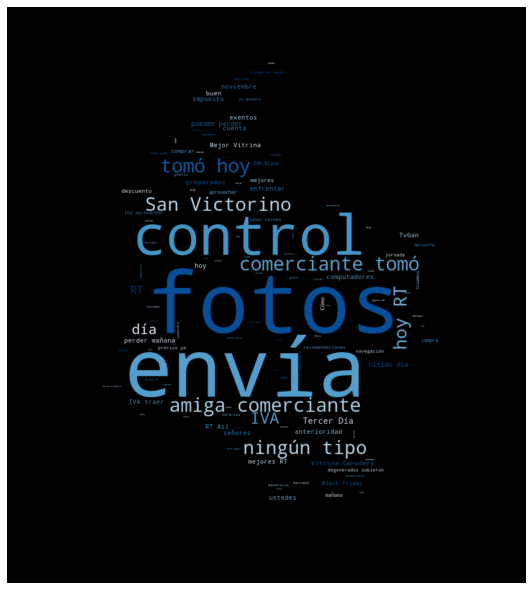

In [90]:
col = PIL.Image.open("./col.jpg")
colMask = np.array(col)
wordcloud = WordCloud(width=1000, height=500,
                     max_font_size= 150, max_words=400,
                     background_color='black',
                      mask=colMask,
                     colormap='Blues',
                     stopwords=stopwords).generate(textoPositivo)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()